# Neural Network 

- Human brain works with biological neurone. Abality of machine to recognize things like digits, obj on its own is known as neural network. 
- Multiple neurons are combined to form a neural network 

## Anatonamy of Neural network 

- There are three layers: 

1. Input layer --> It takes pixels as input from images 
2. Hidden layer --> Doing computations and extracting features 
3. Output layer --> Provides perdiction (i.e 0-9)

## Key concepts 

1. Weight(w): Lernable paramaters controlling input importance 
2. Bias (b): Shift the activation function curve 
3. Activation function: Change to Non-linearity( eg. ReLU,  Sigmoid, tanh, etc.)
4. Loss Function: Measures how wrong our model 
5. Optimizers: Adjust the weight to minimize loss (SGD, Adam, etc )

- Math behing Neural network: 
    - x(i) --> Input 
    - w(i) --> weight 
    - b --> Bias 
    - z --> Weighted sum 

    -  z = w1x1+w2x2+.............wnxn +b 

    - Activation function 
    a = f(z)

    - If you use ReLU 
    f(z) = max(0,z)

# Classification of digits using NN 

## MNIST: (Modified National institute of Standards and Technology )
## This is hello world of Computer vision 

- 70K images datas for handwritten digits (0-9)
- 28*28 size images  grayscales pixel 
- Train = 60k 
- Test = 10k 


# Preprocessing MNIST dataset 
- Before feeding the nerural network 
    -  z = w1x1+w2x2+.............wnxn +b 

    - Activation function 
    a = f(z)

    - If you use ReLU 
    f(z) = max(0,z)
- Flatten 28*28: 784 input features (for dense layer) 0r keep as 28*28 is we are using CNN

- Normalization : Divide value by 255 to get in range [0,1]
- One-hot Encoding : For eg [ 0 0 0 1 0 0 0 0 0 0]


# MNIST dataset Training Testing and Evaluation 

# Neural network architecture 
- Input : 784 neurones 
- Hidden layer: 128 neurone (ReLU)
- Hidden layer : 64 neurones (ReLU)
- Output layer : 10 neurones (0-9)

# For training 
1. Initialize weight randomly 
2. Forward pass: Compute predictio
3. Calculate loss: 
    - Summation(yilog(yicap))
4. Backpropagation error 
5. Updated weight 
6. Repeate it for many epochs until convergnaces 


# Challanges : 

1. Overfitting : 
    Model memorizes training data but fails with new images data 
    - Dropout, regularization 
    
2: Underfitting: 
    Model too simple (less datatasets)
    
3. Learning rate tuning: 
      - too hight = unstable 
      - too low = slow 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


2025-08-16 20:26:37.906524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 28, 28)
(10000, 28, 28)


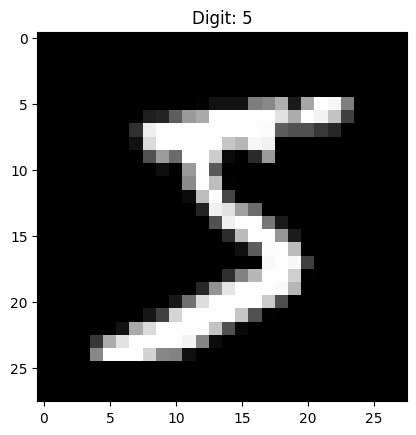

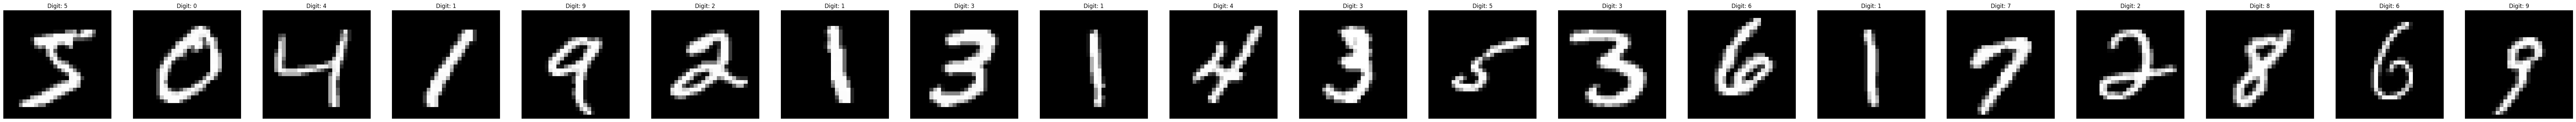

In [2]:
#load dataset and let's visualize it 

(x_train, y_train), (x_test, y_test) = mnist.load_data()


print(x_train.shape)
print(x_test.shape)


# Digit 

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Digit: {y_train[0]}")
plt.show()


# TO dispolay multiple datas in row 
plt.figure(figsize=(100,20))
for i in range(20): 
    plt.subplot(1,20,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')
plt.show()

In [3]:
# Data preprocessing 

#Normalization 

x_train = x_train/255
x_test = x_test/255

#On hot encoding 

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test,10)

print(y_train_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Text(0.5, 1.0, 'Digit: 5')

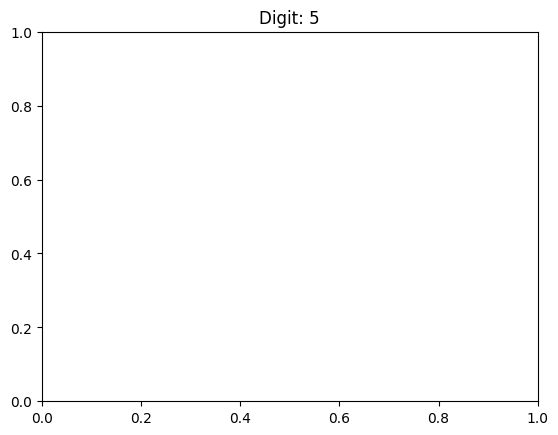

In [4]:
plt.title(f"Digit: {y_train[0]}")

In [5]:
#Build a feed forward neural network 

model = Sequential([
    #Flatten layer 2D shape convert it into 784(1D)
    Flatten(input_shape= (28,28)),
    
    #First hidden layer 
    Dense(128,activation ='relu'),
    
    #second hidden layer 
    Dense(64,activation ='relu'),
    
    #outpurt layer 
    Dense(10, activation = 'softmax'),

])

2025-08-16 20:26:44.560640: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# compile the model '

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [7]:
#train the model 

history = model.fit(
    x_train, 
    y_train_cat, 
    epochs = 10, # no of passes over entire training datas 
    batch_size = 128, 
    validation_split = 0.1 #10% of data remain for validation 
    
)

Epoch 1/10
422/422 [==============================] - 29s 67ms/step - loss: 0.3519 - accuracy: 0.9000 - val_loss: 0.1393 - val_accuracy: 0.9605
Epoch 2/10
422/422 [==============================] - 28s 66ms/step - loss: 0.1411 - accuracy: 0.9583 - val_loss: 0.1106 - val_accuracy: 0.9660
Epoch 3/10
422/422 [==============================] - 25s 58ms/step - loss: 0.0982 - accuracy: 0.9711 - val_loss: 0.0934 - val_accuracy: 0.9728
Epoch 4/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0878 - val_accuracy: 0.9740
Epoch 5/10
422/422 [==============================] - 26s 62ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0908 - val_accuracy: 0.9728
Epoch 6/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0726 - val_accuracy: 0.9785
Epoch 7/10
422/422 [==============================] - 28s 67ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.0849 - val_accuracy:

In [8]:
#Model Evaluation 

loss, accuracy = model.evaluate(x_test,y_test_cat)

print(f"Test accuracy {accuracy} and Loss value: {loss}")

313/313 [==============================] - 13s 41ms/step - loss: 0.0849 - accuracy: 0.9788
Test accuracy 0.9787999987602234 and Loss value: 0.08489716798067093


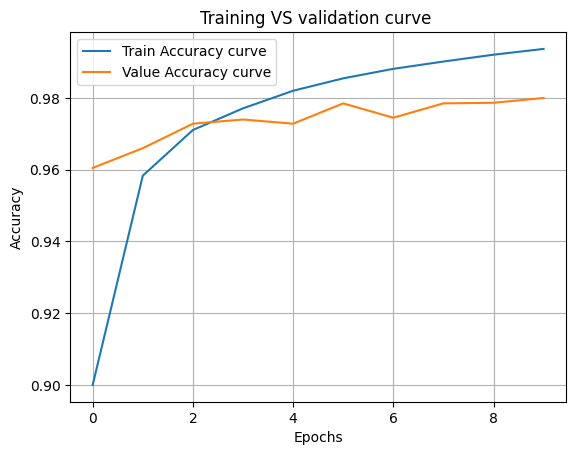

In [9]:
#plotting the model 

plt.plot(history.history['accuracy'],label ="Train Accuracy curve")
plt.plot (history.history['val_accuracy'], label= "Value Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Training VS validation curve ")
plt.legend()
plt.grid(True)
plt.show()




313/313 [==============================] - 14s 45ms/step


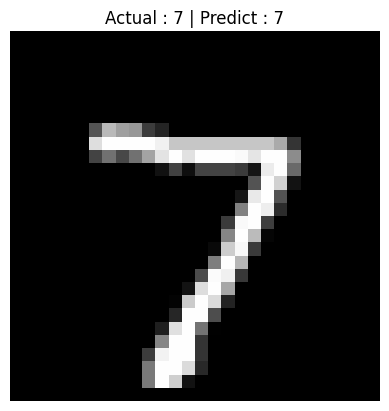

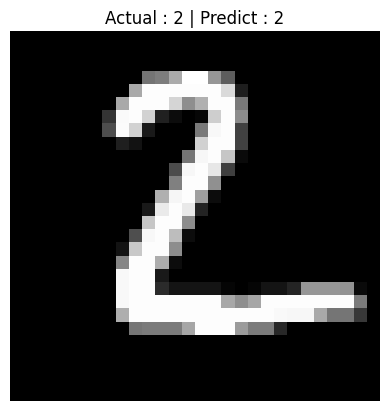

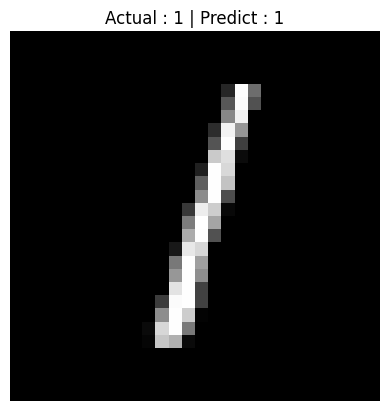

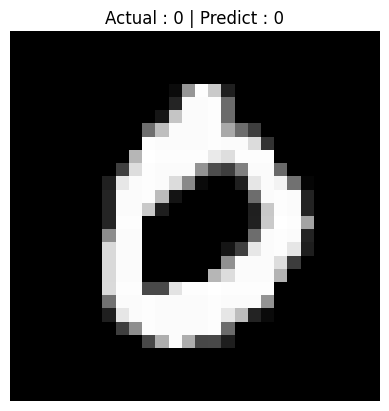

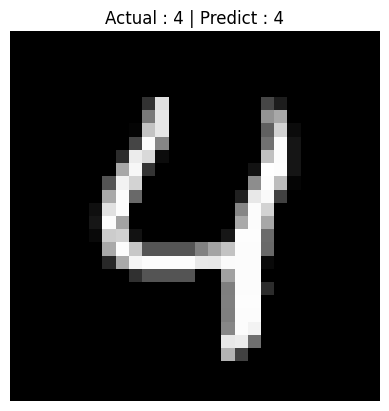

In [10]:
# Predict and visualize 

predictions = model.predict(x_test)

import numpy as np

# Convert probability vectors to class numbers
predicted_classes = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Actual : {y_test[i]} | Predict : {predicted_classes[i]}')
    plt.axis('off')
    plt.show()


In [11]:
#save the model 
model.save("mnist_model.h5")